In [1]:
import numpy as np
import pandas as pd
import subprocess
import re

In [2]:
task = "gemma"
mem = "64"
cpus = "1"
inpath = "../calls/"
covar = "gemma_covar.cov"
maf = "0.05"
prefix = "final_gwas_dataset"
subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
     cpus + " ../" + task + ".sh " + 
     inpath + " " + covar + " " + maf + " " + prefix ], shell=True)

Submitted batch job 9028995


CompletedProcess(args=['sbatch --mem=64g --ntasks=1 ../gemma.sh ../calls/ gemma_covar.cov 0.05 final_gwas_dataset'], returncode=0)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [10]:
df = pd.read_csv("../calls/output/final_gwas_dataset.assoc.txt", sep = '\t')
df['minuslog10pvalue'] = -np.log10(df["p_lrt"])
df = df[~df["p_lrt"].isna()].reset_index(drop=True)

In [13]:
!zcat ../calls/final_gwas_dataset.vcf.gz | grep "3236553"

Apal_hic_scaffold_5	3236553	.	C	A	1518.76	PASS	NS=175;MAF=0.0771429;IMP;AF=0.0715;AC_Het=27;AC_Hom=0;AC_Hemi=0;HWE=0.602487;ExcHet=0.337489;DR2=0.36;AN=588;AC=35	GT:PL:DP:SP:AD:GP:GQ:GL:DS	0/0:0,63,255:21:0:21,0:1,4.39844e-08,6.08887e-29:73:-0,-6.3,-25.5:.	0/0:0,75,255:25:0:25,0:1,2.77522e-09,6.08887e-29:85:-0,-7.5,-25.5:.	0/0:0,63,255:21:0:21,0:1,4.39844e-08,6.08887e-29:73:-0,-6.3,-25.5:.	0/0:0,60,255:20:0:20,0:1,8.77603e-08,6.08887e-29:70:-0,-6,-25.5:.	0/0:0,51,255:17:0:17,0:0.999999,6.97105e-07,6.08886e-29:61:-0,-5.1,-25.5:.	0/0:0,54,255:18:0:18,0:1,3.4938e-07,6.08886e-29:64:-0,-5.4,-25.5:.	0/0:0,63,255:21:0:21,0:1,4.39844e-08,6.08887e-29:73:-0,-6.3,-25.5:.	0/0:0,45,255:15:0:15,0:0.999997,2.77522e-06,6.08885e-29:55:-0,-4.5,-25.5:.	0/0:0,33,243:11:0:11,0:0.999956,4.39824e-05,9.64978e-28:43:-0,-3.3,-24.3:.	0/0:0,27,242:9:0:9,0:0.999825,0.000175074,1.21468e-27:37:-0,-2.7,-24.2:.	0/0:0,75,255:25:0:25,0:1,2.77522e-09,6.08887e-29:85:-0,-7.5,-25.5:.	0/0:0,75,255:25:0:25,0:1,2.77522e-09,6.0

^C


In [15]:
!zcat ../calls/final_gwas_dataset.vcf.gz | grep "^Apal_hic_scaffold_31" | grep "12394664"

Apal_hic_scaffold_31	12394664	.	C	T	9878.18	PASS	NS=175;MAF=0.205714;IMP;AF=0.1658;AC_Het=56;AC_Hom=16;AC_Hemi=0;HWE=0.816764;ExcHet=0.713953;DR2=0.45;AN=588;AC=127	GT:PL:DP:SP:AD:GP:GQ:GL:DS	0/1:214,0,249:20:0:11,9:6.36566e-22,1,1.96832e-26:127:-21.4,-0,-24.9:.	0/0:0,72,255:24:0:24,0:1,3.94599e-08,3.09209e-27:74:-0,-7.2,-25.5:.	0/1:220,0,225:21:2:10,11:1.59898e-22,1,4.9442e-24:127:-22,-0,-22.5:.	0/1:255,0,255:22:10:10,12:5.05643e-26,1,4.9442e-27:127:-25.5,-0,-25.5:.	0/1:243,0,223:22:0:11,11:8.0139e-25,1,7.83604e-24:127:-24.3,-0,-22.3:.	0/1:201,0,203:16:5:9,7:1.27012e-20,1,7.83603e-22:127:-20.1,-0,-20.3:.	0/1:69,0,222:9:3:6,3:2.013e-07,1,9.86498e-24:66:-6.9,-0,-22.2:.	0/1:255,0,228:22:4:9,13:5.05643e-26,1,2.47797e-24:127:-25.5,-0,-22.8:.	0/0:0,30,219:10:0:10,0:0.999375,0.000625007,1.23022e-23:32:-0,-3,-21.9:.	1/1:255,24,0:8:0:0,8:3.15375e-25,0.0248304,0.97517:16:-25.5,-2.4,-0:.	0/1:172,0,138:12:0:6,6:1.00889e-17,1,2.47797e-15:127:-17.2,-0,-13.8:.	0/0:0,69,255:23:0:23,0:1,7.87329e-08,3.

In [12]:
df.sort_values("p_lrt")

,chr,rs,ps,n_miss,allele1,allele0,af,beta_1,beta_2,Vbeta_1_1,Vbeta_1_2,Vbeta_2_2,p_lrt,minuslog10pvalue
113621,Apal_hic_scaffold_5,.,3236553,0,A,C,0.057,-0.028721,0.441491,0.010369,-0.001713,0.007023,0.000003,5.566083
339775,Apal_hic_scaffold_31,.,12394664,0,T,C,0.237,0.238897,-0.116748,0.002478,-0.000289,0.002352,0.000008,5.106676
113623,Apal_hic_scaffold_5,.,3236579,0,T,C,0.060,0.047630,0.389165,0.009893,-0.001836,0.006942,0.000016,4.799392
30042,Apal_hic_scaffold_1,.,13961415,0,T,A,0.263,-0.073217,-0.170519,0.002509,-0.000505,0.001699,0.000019,4.727854
339771,Apal_hic_scaffold_31,.,12393393,0,G,C,0.247,0.229031,-0.103147,0.002486,-0.000308,0.002352,0.000028,4.560273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301309,Apal_hic_scaffold_21,.,7686282,0,T,C,0.173,0.000372,-0.000058,0.003646,-0.000655,0.002991,1.000000,-0.000000
329050,Apal_hic_scaffold_31,.,2602473,0,G,A,0.437,0.000120,-0.000142,0.002445,-0.000451,0.002010,1.000000,-0.000000
57797,Apal_hic_scaffold_2,.,15089675,0,G,A,0.107,-0.000311,0.000312,0.004584,-0.000825,0.003761,1.000000,-0.000000
171465,Apal_hic_scaffold_10,.,19952685,0,A,G,0.117,-0.000011,-0.000306,0.005024,-0.000894,0.004118,1.000000,-0.000000


In [5]:
df["pval_cor"] = scipy.stats.false_discovery_control(df["p_lrt"].to_numpy())

In [6]:
df = df[["ps", "minuslog10pvalue", "chr"]]

In [9]:
df.sort_values("minuslog10pvalue")

,ps,minuslog10pvalue,chr,ind
171465,19952685,-0.000000,Apal_hic_scaffold_10,60645
345671,18290246,-0.000000,Apal_hic_scaffold_31,247505
329050,2602473,-0.000000,Apal_hic_scaffold_31,253795
301309,7686282,-0.000000,Apal_hic_scaffold_21,226245
57797,15089675,-0.000000,Apal_hic_scaffold_2,147930
...,...,...,...,...
339771,12393393,4.560273,Apal_hic_scaffold_31,243117
30042,13961415,4.727854,Apal_hic_scaffold_1,8583
113623,3236579,4.799392,Apal_hic_scaffold_5,339524
339775,12394664,5.106676,Apal_hic_scaffold_31,243093


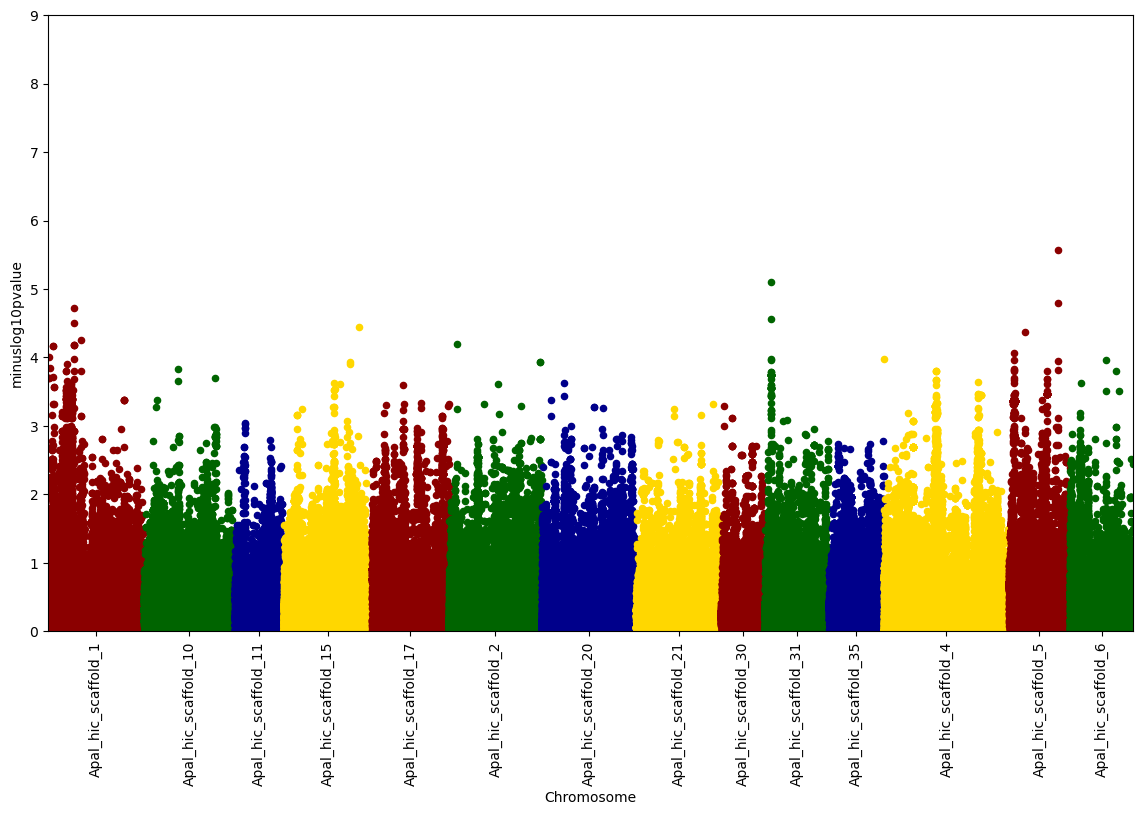

In [7]:
df.chr = df.chr.astype('category')
#df.chr = df.chr.cat.set_categories(['ch-%i' % i for i in range(12)], ordered=True)
df = df.sort_values('chr')

# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df_grouped = df.groupby(('chr'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['darkred','darkgreen','darkblue', 'gold']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, 9])

# x axis label
ax.set_xlabel('Chromosome')
plt.xticks(rotation=90)
# show the graph
plt.show()